In [53]:
from sklearn import svm
import seaborn as sns
import numpy as np
import geopandas as gpd
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [4]:
#read and prepare data
df=gpd.read_file('Data/NepalEqUSGSV3.shp')
train_df, test_df = train_test_split(df, test_size=0.30, random_state=42)

In [15]:
train_df_numeric=train_df[['Est_m','Nrt_m','HC_m','VC_m','Slp_m','Prc_m','NDVI_m','PGV_Usgs','Sand_m','Silt_m','Clay_m','Bdod_m']]#'GLG','Landslide']]
train_df_cat=pd.get_dummies(train_df[['GLG']])
Xtrain=pd.concat([train_df_numeric, train_df_cat], axis=1).to_numpy()
Ytrain=train_df.Landslide.to_numpy()

In [13]:
test_df_numeric=test_df[['Est_m','Nrt_m','HC_m','VC_m','Slp_m','Prc_m','NDVI_m','PGV_Usgs','Sand_m','Silt_m','Clay_m','Bdod_m']]#'GLG','Landslide']]
test_df_cat=pd.get_dummies(test_df[['GLG']])
Xtest=pd.concat([test_df_numeric, test_df_cat], axis=1).to_numpy()
Ytest=test_df.Landslide.to_numpy()

# SVM

0.8283160519753249
[[3742  268]
 [ 560  390]]
0.8084677419354839


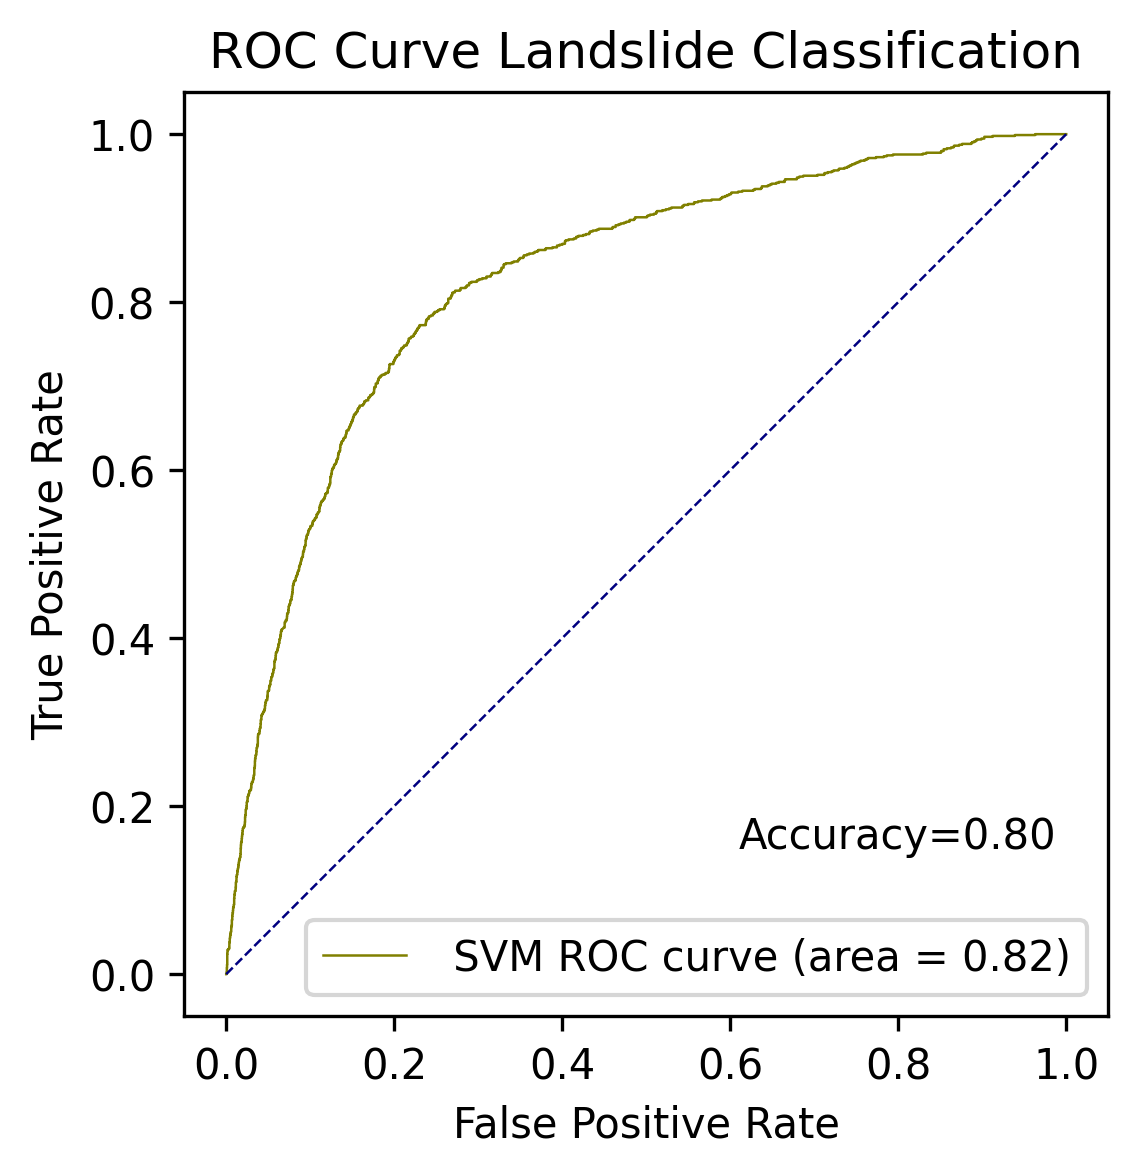

In [51]:
clf = svm.SVC(probability=True)#make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(Xtrain, Ytrain)

svm_preds=clf.predict_proba(Xtest)
svm_clf=clf.predict(Xtest)

fpr,tpr,thresholds=sklearn.metrics.roc_curve(Ytest, svm_preds[:,1])
print(sklearn.metrics.auc(fpr,tpr))
print(sklearn.metrics.confusion_matrix(Ytest,np.rint(svm_preds[:,1])))
print(sklearn.metrics.accuracy_score(Ytest, svm_clf))
plt.figure(figsize=(4,4),dpi=300)
lw = 0.6
plt.plot(
    fpr,
    tpr,
    color="olive",
    lw=lw,
    label=f" SVM ROC curve (area = 0.82)" ,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Landslide Classification")
plt.text(0.61, 0.15,"Accuracy=0.80")
plt.legend(loc="lower right")
plt.savefig('Exaiplots/rocSVMrev1.pdf')
plt.axis('square')
plt.show()


# Random Forest

0.8540379314870719
[[3907  103]
 [ 693  257]]
0.839516129032258


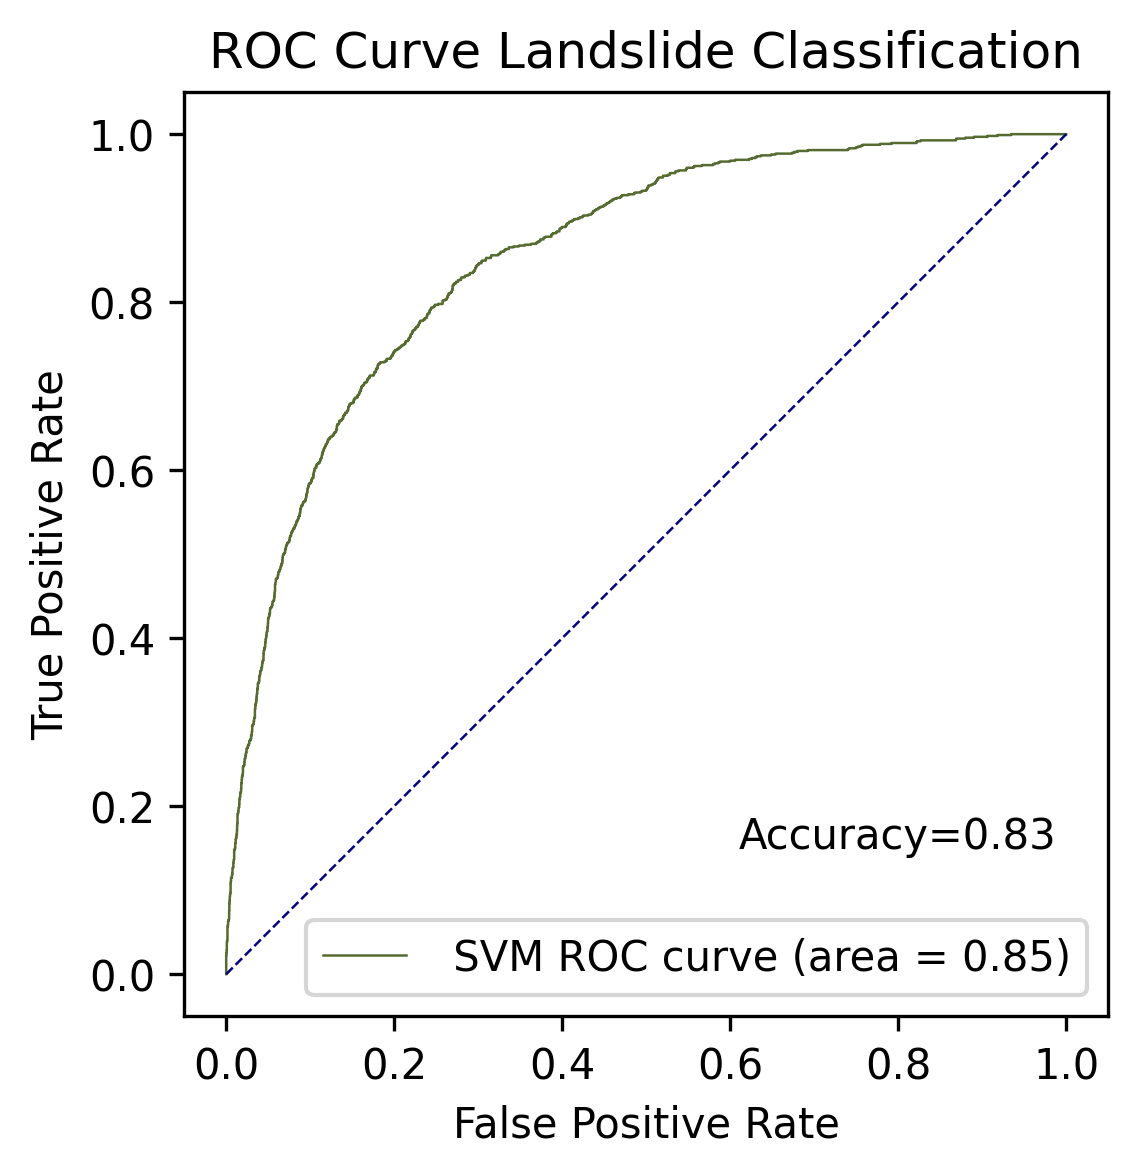

In [55]:
clf = RandomForestClassifier(max_depth=4, random_state=0)#make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(Xtrain, Ytrain)

svm_preds=clf.predict_proba(Xtest)
svm_clf=clf.predict(Xtest)

fpr,tpr,thresholds=sklearn.metrics.roc_curve(Ytest, svm_preds[:,1])
print(sklearn.metrics.auc(fpr,tpr))
print(sklearn.metrics.confusion_matrix(Ytest,np.rint(svm_preds[:,1])))
print(sklearn.metrics.accuracy_score(Ytest, svm_clf))
plt.figure(figsize=(4,4),dpi=300)
lw = 0.6
plt.plot(
    fpr,
    tpr,
    color="darkolivegreen",
    lw=lw,
    label=f" SVM ROC curve (area = 0.85)" ,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Landslide Classification")
plt.text(0.61, 0.15,"Accuracy=0.83")
plt.legend(loc="lower right")
plt.savefig('Exaiplots/rocRFrev1.pdf')
plt.axis('square')
plt.show()
